In [7]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
data, _ = make_blobs(1000, centers = 3, cluster_std=1.9, random_state = 10)

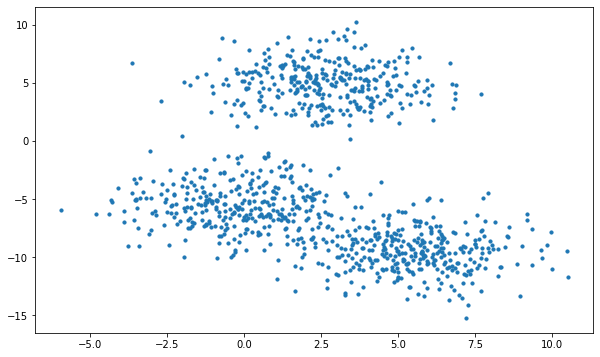

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s = 10)
plt.show()

In [8]:
def euclideanDist(a,b,ax=1):
    return np.linalg.norm(a - b, axis = ax)

In [34]:
k = 3
C_x = np.random.randint(0, np.max(data) - 5, size = 3)
C_y = np.random.randint(0, np.max(data) - 5, size = 3)

In [35]:
C_x, C_y

(array([3, 1, 4]), array([2, 2, 3]))

In [36]:
centroids = np.array(list(zip(C_x, C_y)), dtype = np.float32)

In [37]:
centroids

array([[3., 2.],
       [1., 2.],
       [4., 3.]], dtype=float32)

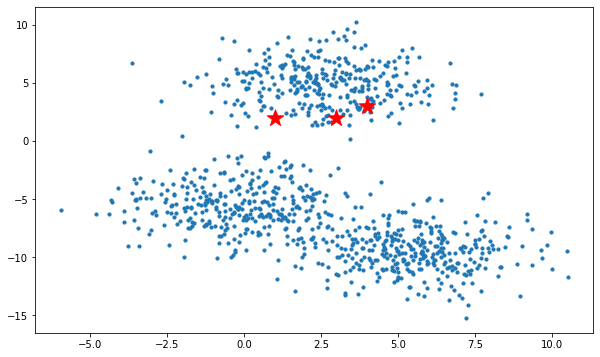

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s = 10)
plt.scatter(C_x, C_y, marker = '*', s = 300, c = 'red')
plt.show()

In [39]:
C_old = np.zeros_like(centroids)

In [40]:
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [41]:
clusters = np.zeros(len(data))

In [42]:
def plotData(points, clusters, centroids):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    plt.figure(figsize=(10,6))
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:,0], points[:,1], s = 7, c = colors[i])
    ax.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 200, c = 'm')
    plt.show()

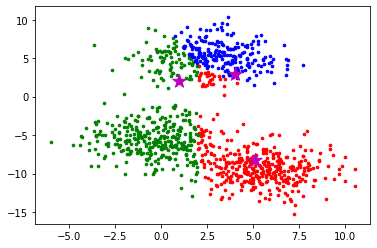

<Figure size 720x432 with 0 Axes>

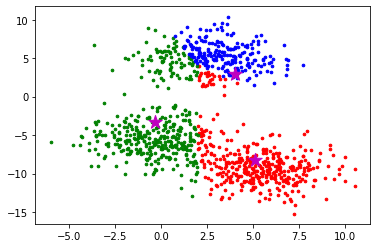

<Figure size 720x432 with 0 Axes>

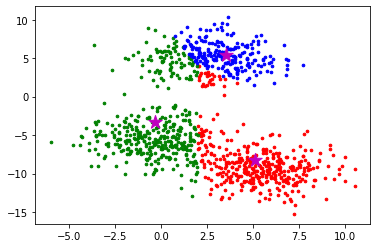

<Figure size 720x432 with 0 Axes>

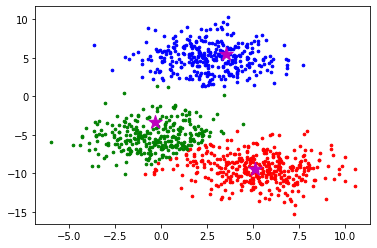

<Figure size 720x432 with 0 Axes>

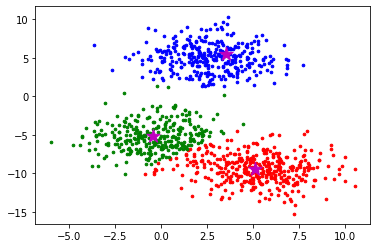

<Figure size 720x432 with 0 Axes>

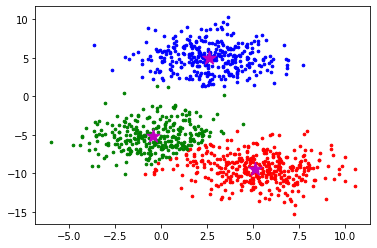

<Figure size 720x432 with 0 Axes>

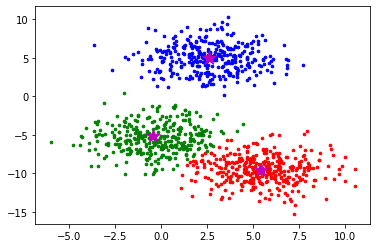

<Figure size 720x432 with 0 Axes>

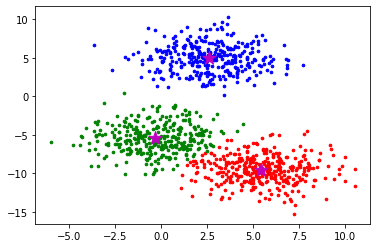

<Figure size 720x432 with 0 Axes>

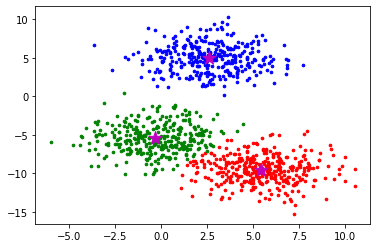

<Figure size 720x432 with 0 Axes>

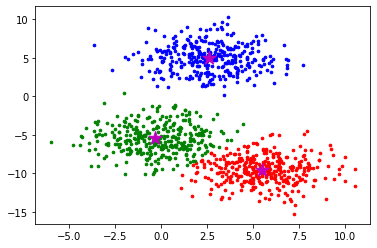

<Figure size 720x432 with 0 Axes>

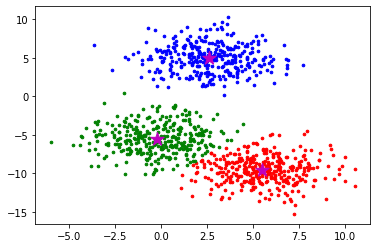

<Figure size 720x432 with 0 Axes>

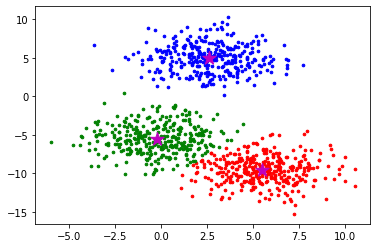

<Figure size 720x432 with 0 Axes>

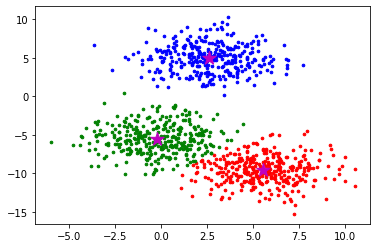

<Figure size 720x432 with 0 Axes>

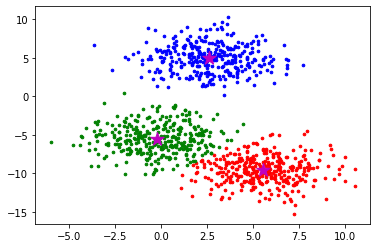

<Figure size 720x432 with 0 Axes>

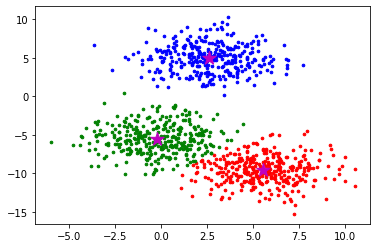

<Figure size 720x432 with 0 Axes>

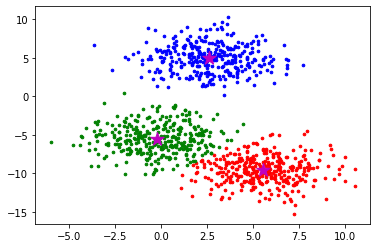

<Figure size 720x432 with 0 Axes>

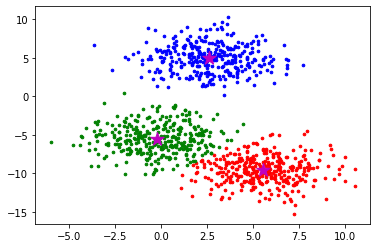

<Figure size 720x432 with 0 Axes>

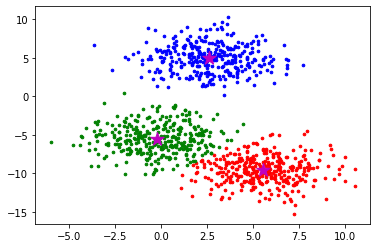

<Figure size 720x432 with 0 Axes>

In [43]:
error = euclideanDist(centroids, C_old, None)
while error != 0:
    for i in range(len(data)):
        distance = euclideanDist(data[i], centroids)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    C_old = deepcopy(centroids)
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis = 0)
        plotData(points, clusters, centroids)
    error = euclideanDist(centroids, C_old, None)
